# Corona-Virus- Basic EDA - By Atishay Jain
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/82/SARS-CoV-2_without_background.png" width="100" height="100" align=left>

In [44]:
# Importing relavant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Import dataset
df = pd.read_csv('covid_19_data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 8 columns):
SNo                20574 non-null int64
ObservationDate    20574 non-null object
Province/State     10026 non-null object
Country/Region     20574 non-null object
Last Update        20574 non-null object
Confirmed          20574 non-null float64
Deaths             20574 non-null float64
Recovered          20574 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.3+ MB


In [47]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [48]:
country_wise_df = df.groupby(by='Country/Region').max()

In [49]:
country_wise_df.reset_index(drop=False, inplace=True)

In [50]:
country_wise_df_15= country_wise_df.sort_values(by=['Confirmed'],ascending=False).head(25)

## Top affected countries <font color='blue'>Confirmed</font> Vs <font color='green'>Recovered</font> Vs <font color='red'>Deaths</font>

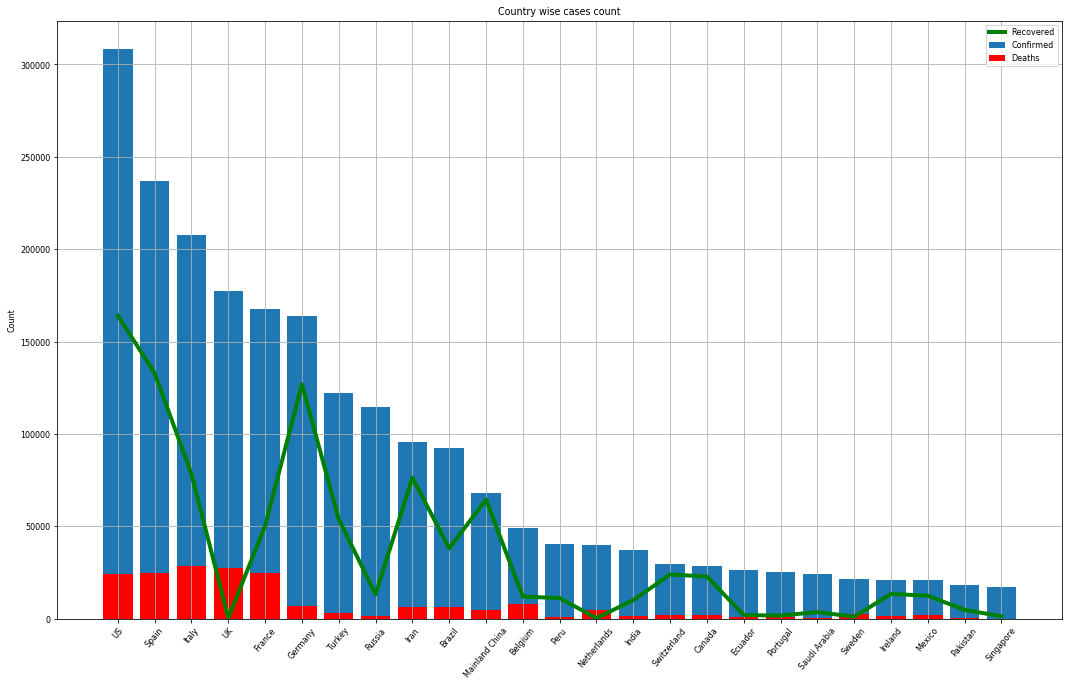

In [51]:
plt.figure(figsize=(18,11))
plt.bar(country_wise_df_15['Country/Region'],country_wise_df_15['Confirmed'])
plt.bar(country_wise_df_15['Country/Region'],country_wise_df_15['Deaths'],color='red')
plt.plot(country_wise_df_15['Country/Region'],country_wise_df_15['Recovered'],color='green',linewidth=4)
plt.grid(True)
plt.ylabel('Count')
plt.title('Country wise cases count')
plt.xticks(rotation=50)
plt.legend(['Recovered', 'Confirmed','Deaths'], loc=1) # 3,1,2 Lines then pathes

At the first glance, we can see the top of the top affected countries <font color='red'> U.K.</font> have too low recovery rate than rate.<br>
Where <font color='blue'>US, spain, Italy </font> have even better.<br>
But, can we say that US, spain are doin better in terms of treatment irrespective they have higher confirmed cases or this is because of higher cases ?<br>


In [52]:
date_wise_df = df.groupby(by='ObservationDate').sum()

In [53]:
date_wise_df.reset_index(drop=False, inplace=True)

## Cases World wide histogram <font color='blue'>Confirmed</font> Vs <font color='green'>Recovered</font> Vs <font color='red'>Deaths</font>

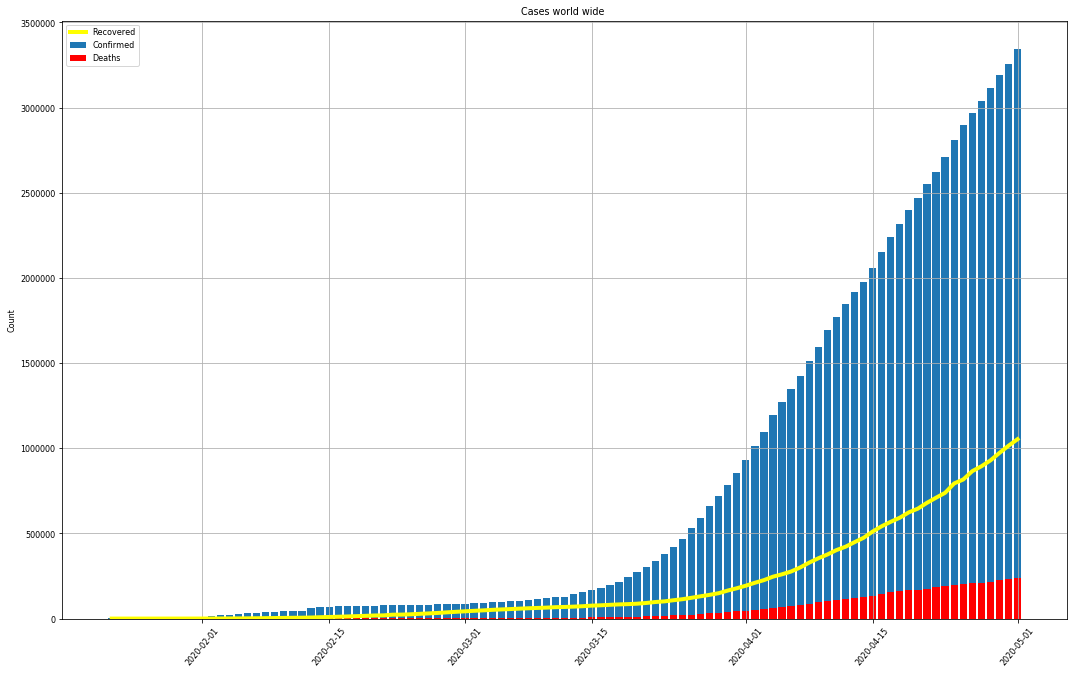

In [54]:
plt.figure(figsize=(18,11))
plt.bar(date_wise_df['ObservationDate'],date_wise_df['Confirmed'])
plt.bar(date_wise_df['ObservationDate'],date_wise_df['Deaths'],color='red')
plt.plot(date_wise_df['ObservationDate'],date_wise_df['Recovered'],color='yellow',linewidth=4)
plt.grid(True)
plt.ylabel('Count')
plt.title('Cases world wide ')
plt.xticks(rotation=50)
plt.legend(['Recovered', 'Confirmed','Deaths'], loc=2)

## World-wide <font color='blue'>Death Rate with respect to total Cases</font> Vs <font color='red'>Death Rate with respect to closed cases</font> 

So far we have seen people talking about death rate which was 4%, now 6.some% now and later some other percentage.
Then we have another stats which says ---- > Age Vs died percentage. 
75+ years old : 47.7 % <br>
65 - 74 years old : 24.6% <br>
45 - 64 years old : 23.1% <br>
18 - 44 years old : 4.5% <br>
0 - 17 years old : 0.04%  <br>
**Data as of now, source : www.worldometers.info** 
**Last update 14th April**
<br>
Talking about overall deathrate vs the death rate with respect to total closed cases. There will be difference, but by what ratio.. <br>
Let find out.

In [55]:
recent_od = date_wise_df['ObservationDate'].max()
recent_count = int(date_wise_df[date_wise_df['ObservationDate'] == recent_od]['Confirmed'])
recent_deaths = int(date_wise_df[date_wise_df['ObservationDate'] == recent_od]['Deaths'])
recent_recov = int(date_wise_df[date_wise_df['ObservationDate'] == recent_od]['Recovered'])
print('Death rate with respect to total Overall cases : ',recent_deaths*100/recent_count)
print('Death rate with respect to total Closed cases : ',recent_deaths*100/(recent_deaths+recent_recov))


Death rate with respect to total Overall cases :  7.137138630955354
Death rate with respect to total Closed cases :  18.471691059515766


Now you have observed that there is significant amount of gap between both the death rate which was obvious. <br>
Plotting the graph and see how it changes over the time.

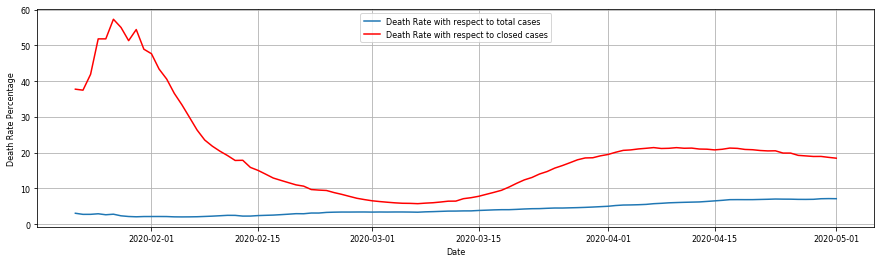

In [56]:
# Death Rate = Death / total cases
# Death Rate = Death / Death + Recovered
plt.figure(figsize=(15,4))
x = date_wise_df['ObservationDate']
y_deathrate1 = (date_wise_df['Deaths']/date_wise_df['Confirmed'])*100
y_deathrate2 = (date_wise_df['Deaths']/ (date_wise_df['Deaths'] + date_wise_df['Recovered']))*100

plt.plot(x, y_deathrate1) 
plt.plot(x, y_deathrate2, color='red')

plt.ylabel('Death Rate Percentage') 
plt.xlabel('Date') 
plt.legend(['Death Rate with respect to total cases', 'Death Rate with respect to closed cases'], loc=9)
plt.grid(True)
plt.show() 

With the above curve, we can see that the initial rate much higher because there was less awareness with respect to procedure and how to deal with situation.<br>
in the middle we can see there is death rate as the awareness and treatment procedure changes, in the end we can see that curve increases as no. of patient increaes, which results in higher no. of death rate.

## World-wide <font color='blue'>Recovery Rate with respect to total Cases</font> Vs <font color='green'>Recovery Rate with respect to closed cases</font> 

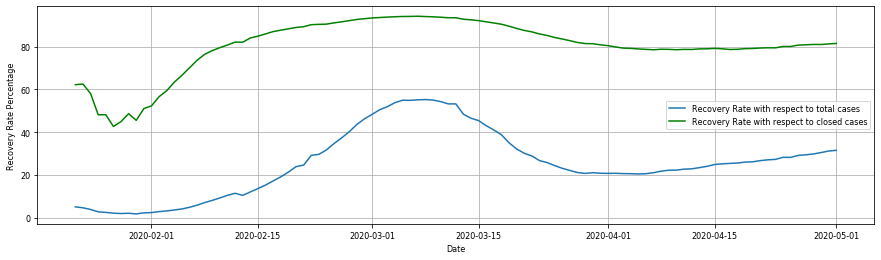

In [57]:
plt.figure(figsize=(15,4))
x = date_wise_df['ObservationDate']
y_deathrate1 = (date_wise_df['Recovered']/date_wise_df['Confirmed'])*100
y_deathrate2 = (date_wise_df['Recovered']/ (date_wise_df['Deaths'] + date_wise_df['Recovered']))*100

plt.plot(x, y_deathrate1) 
plt.plot(x, y_deathrate2, color='green')

plt.ylabel('Recovery Rate Percentage') 
plt.xlabel('Date') 
plt.legend(['Recovery Rate with respect to total cases', 'Recovery Rate with respect to closed cases'], loc=7)
plt.grid(True)
plt.show() 

# Now India

In [58]:
df_india = df[df['Country/Region']=='India']

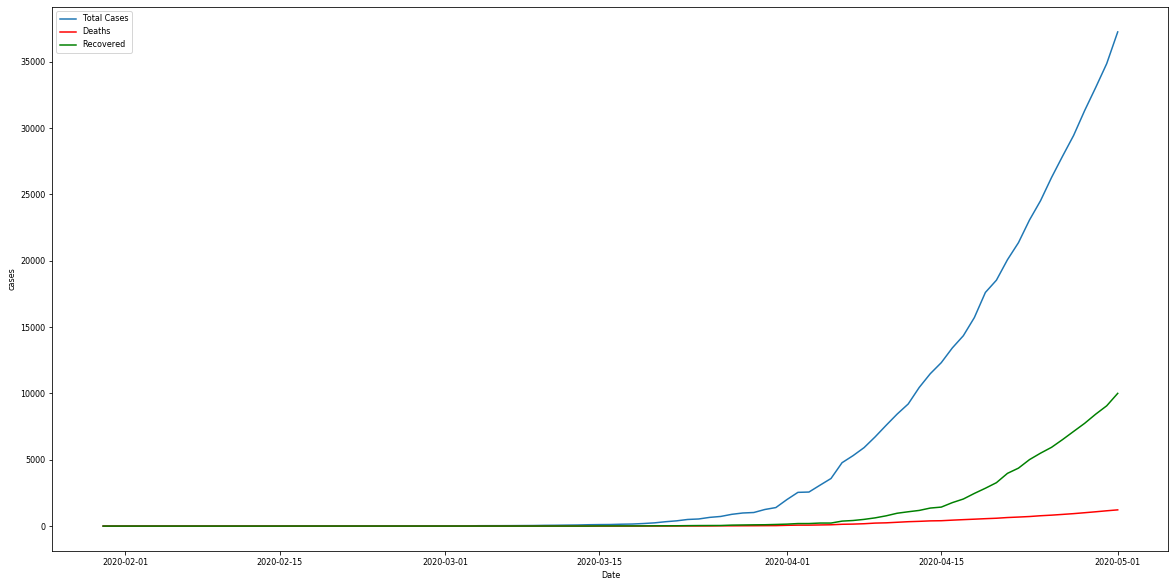

In [59]:
plt.figure(figsize=(20,10))
x = df_india['ObservationDate']
y_con=df_india['Confirmed']
y_death = df_india['Deaths']
y_rec = df_india['Recovered']
plt.plot(x, y_con) 
plt.plot(x, y_death, color='red')
plt.plot(x, y_rec, color='green')
plt.ylabel('cases') 
plt.xlabel('Date') 
plt.legend(['Total Cases', 'Deaths','Recovered'], loc=2)
plt.show() 

In [60]:
#plt.figure(figsize=(18,11))
#plt.bar(df_india['ObservationDate'],df_india['Confirmed'])
#plt.bar(df_india['ObservationDate'],df_india['Deaths'],color='red')
#plt.plot(df_india['ObservationDate'],df_india['Recovered'],color='yellow',linewidth=4)
#plt.grid(True)
#plt.ylabel('Count')
#plt.title('Cases in india over time')
#plt.xticks(rotation=50)
#plt.legend(['Recovered', 'Confirmed','Deaths'], loc=2)

In [61]:
recent_od = df_india['ObservationDate'].max()
recent_count = int(df_india[df_india['ObservationDate'] == recent_od]['Confirmed'])
recent_deaths = int(df_india[df_india['ObservationDate'] == recent_od]['Deaths'])
recent_recov = int(df_india[df_india['ObservationDate'] == recent_od]['Recovered'])
print('Death rate with respect to total Overall cases : ',recent_deaths*100/recent_count)
print('Death rate with respect to total Closed cases : ',recent_deaths*100/(recent_deaths+recent_recov))


Death rate with respect to total Overall cases :  3.282604611214
Death rate with respect to total Closed cases :  10.890471950133572


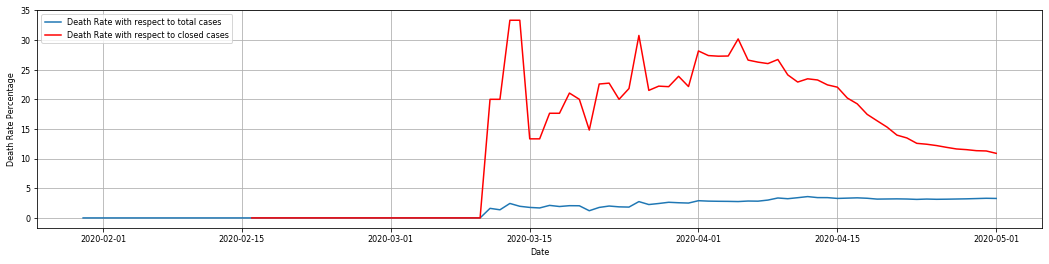

In [62]:
# Death Rate = Death / total cases
# Death Rate = Death / Death + Recovered
plt.figure(figsize=(18,4))
x = df_india['ObservationDate']
y_deathrate1 = (df_india['Deaths']/df_india['Confirmed'])*100
y_deathrate2 = (df_india['Deaths']/ (df_india['Deaths'] + df_india['Recovered']))*100

plt.plot(x, y_deathrate1) 
plt.plot(x, y_deathrate2, color='red')

plt.ylabel('Death Rate Percentage') 
plt.xlabel('Date') 
plt.legend(['Death Rate with respect to total cases', 'Death Rate with respect to closed cases'], loc=2)
plt.grid(True)
plt.show() 

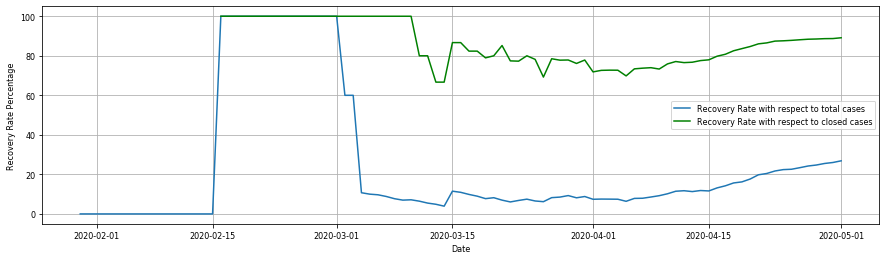

In [63]:
plt.figure(figsize=(15,4))
x = df_india['ObservationDate']
y_deathrate1 = (df_india['Recovered']/df_india['Confirmed'])*100
y_deathrate2 = (df_india['Recovered']/ (df_india['Deaths'] + df_india['Recovered']))*100

plt.plot(x, y_deathrate1) 
plt.plot(x, y_deathrate2, color='green')

plt.ylabel('Recovery Rate Percentage') 
plt.xlabel('Date') 
plt.legend(['Recovery Rate with respect to total cases', 'Recovery Rate with respect to closed cases'], loc=7)
plt.grid(True)
plt.show() 

Trend in of death rate and recovery rate in india quiet different from the world as of now, but later it might changes.
Also it is difficult to interprett any result from it.

## How well we are prepared, for testing the cases nation wide

In [64]:
pop_df =pd.read_csv('population_india_census2011.csv')

In [65]:
labs_df = pd.read_csv('ICMRTestingLabs.csv')
labs_df = labs_df.drop(['address', 'pincode','city','type'], axis = 1) 
labs_df2 = labs_df.groupby(by='state').count()

In [66]:
labs_df2.reset_index(drop=False, inplace=True)

In [67]:
labs_df2 = labs_df2.rename(columns={ 'state' : 'State / Union Territory'})

In [68]:
labs_df3 = pd.merge(labs_df2, pop_df, how='left', on=['State / Union Territory']) 

In [69]:
labs_df3 = labs_df3[(labs_df3['State / Union Territory'] != 'Telangana') ]


In [70]:
labs_df3['Area'] = labs_df3.Area.apply(lambda x : x.split()[0])

In [71]:
labs_df3['Area'] = labs_df3.Area.apply(lambda x : x.replace(',', ''))
labs_df3['Area'] = pd.to_numeric(labs_df3['Area'])

In [72]:
# Labs per state
# labs per 10 lakh population
labs_df3['labs_pw'] = labs_df3['lab']/(labs_df3['Population']/1000000)
# labs area wise labs per 10 thousand area
labs_df3['labs_aw'] = labs_df3['lab']/(labs_df3['Area']/10000)

Text(0.5, 1.0, 'No. of labs per Ten Thousand sq. meters state wise')

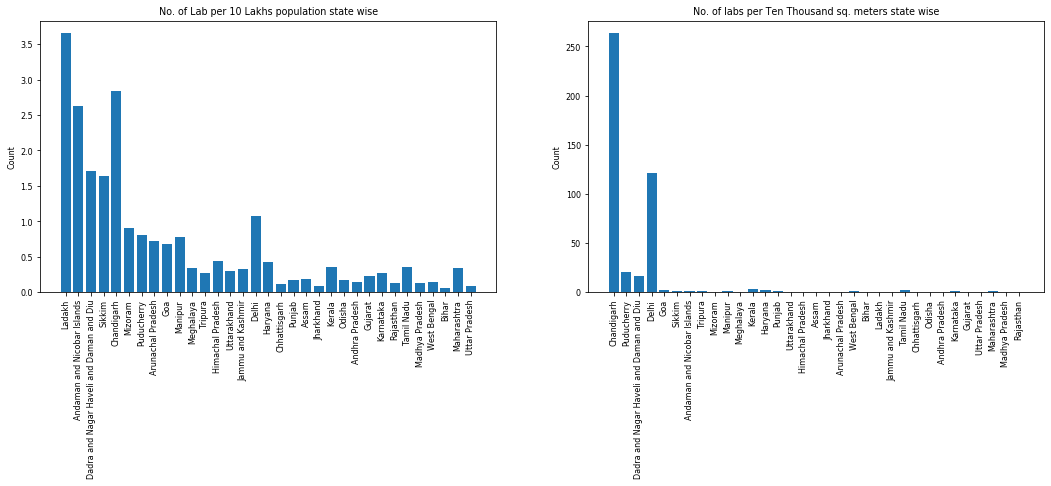

In [73]:
labs_df3 = labs_df3.sort_values('Population', axis = 0) 
plt.figure(figsize=(18,11))
plt.subplot(2, 2, 1)
plt.bar(labs_df3['State / Union Territory'],labs_df3['labs_pw'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('No. of Lab per 10 Lakhs population state wise')

labs_df3 = labs_df3.sort_values('Area', axis = 0) 
plt.subplot(2, 2, 2)
plt.bar(labs_df3['State / Union Territory'],labs_df3['labs_aw'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('No. of labs per Ten Thousand sq. meters state wise')


Due to these 4 union territory we can't see actual stats of other states and union terrritory **(In No. of labs area wise)**, <br> 
1 . Dadra and Nagar Haveli and Daman and Diu<br>
2 . Chandigarh<br>
3 . Delhi<br>
4 . Puducherry<br>
taking these as expection, we remove it and lets see it again.

In [74]:
labs_df4 = labs_df3[(labs_df3['State / Union Territory'] != 'Delhi') ]
labs_df4 = labs_df4[(labs_df4['State / Union Territory'] != 'Puducherry')]
labs_df4 = labs_df4[(labs_df4['State / Union Territory'] != 'Chandigarh') ]
labs_df4 = labs_df4[(labs_df4['State / Union Territory'] != 'Dadra and Nagar Haveli and Daman and Diu')]

Text(0.5, 1.0, 'No. of labs per Ten Thousand sq. meters state wise')

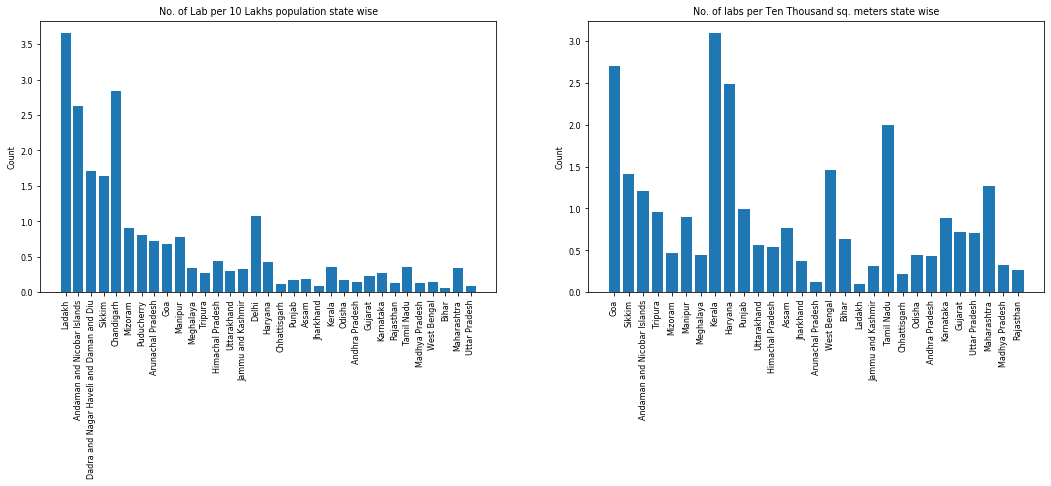

In [75]:
labs_df3 = labs_df3.sort_values('Population', axis = 0) 
plt.figure(figsize=(18,11))
plt.subplot(2, 2, 1)
plt.bar(labs_df3['State / Union Territory'],labs_df3['labs_pw'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('No. of Lab per 10 Lakhs population state wise')

labs_df4 = labs_df4.sort_values('Area', axis = 0) 
plt.subplot(2, 2, 2)
plt.bar(labs_df4['State / Union Territory'],labs_df4['labs_aw'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('No. of labs per Ten Thousand sq. meters state wise')


### From the above we can see that, major problem we might face in the states where no. of labs count is less than 1 per 10 Lakh people, and even worse Lab's count deduced to less than 0.5.
### Also we can see it area wise, where the lab count is less than 0.5 per ten thousand met. sq. 
### But Less lab count population wise is more crucial.

In [76]:
states_list1 = set(labs_df3[(labs_df3['labs_pw'] < 0.5)]['State / Union Territory']).union(set(labs_df3[(labs_df3['labs_aw'] < 0.5)]['State / Union Territory']))
states_list1

{'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Meghalaya',
 'Mizoram',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

### Above are the STATES, where In case COVID-19 Speard it will become difficult to test because of Lab avaiablity

In [77]:
ind_states_df = pd.read_csv('IndividualDetails.csv')

In [78]:
ind_states_df = ind_states_df.drop(['id','government_id', 'age','gender','detected_city','detected_district','nationality',
                                   'status_change_date','notes'], axis = 1) 

In [79]:
ind_states_df_count = ind_states_df.groupby(by='detected_state').count()

In [80]:
ind_states_df_count = ind_states_df_count.rename(columns={"diagnosed_date": "count"})
ind_states_df_count.reset_index(drop=False, inplace=True)

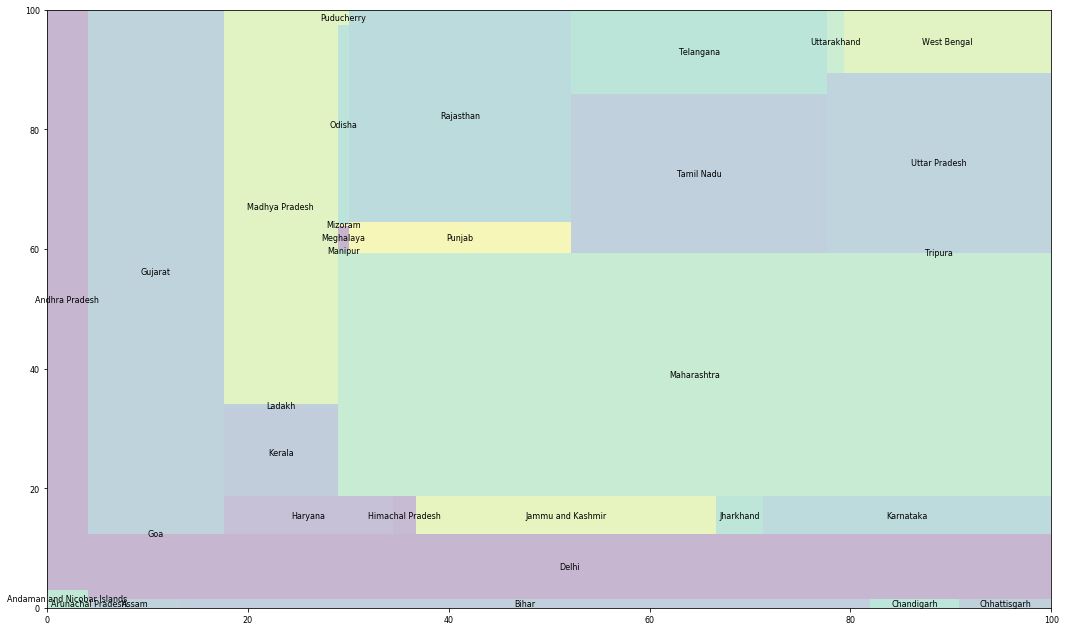

In [81]:
import squarify
plt.figure(figsize=(18,11))
plt.rc('font', size=8)
squarify.plot(sizes=ind_states_df_count['count'], label=ind_states_df_count['detected_state'], alpha=.3)


plt.show()

In [82]:
df_india_cnf = df_india
df_india_cnf = df_india_cnf.drop(columns=['Last Update', 'Province/State','Country/Region','SNo','Deaths','Recovered'])

In [83]:
df_india_cnf['diff_days'] = df_india_cnf['ObservationDate'] - df_india_cnf['ObservationDate'].min()
df_india_cnf['diff_days']=df_india_cnf['diff_days']/np.timedelta64(1,'D')


In [84]:
df_india_cnf

,ObservationDate,Confirmed,diff_days
430,2020-01-30,1.0,0.0
491,2020-01-31,1.0,1.0
547,2020-02-01,1.0,2.0
607,2020-02-02,2.0,3.0
672,2020-02-03,3.0,4.0
740,2020-02-04,3.0,5.0
810,2020-02-05,3.0,6.0
881,2020-02-06,3.0,7.0
954,2020-02-07,3.0,8.0
1026,2020-02-08,3.0,9.0


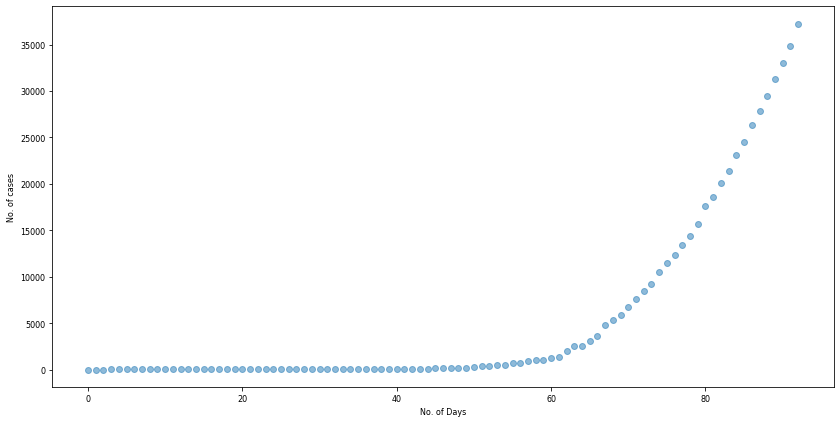

In [85]:
# Plot
plt.figure(figsize=(14,7))
plt.scatter(df_india_cnf['diff_days'], df_india_cnf['Confirmed'], alpha=0.5)
#plt.title('')
plt.xlabel('No. of Days')
plt.ylabel('No. of cases')
plt.show()